# Coffee Transaction Analysis During Exam Periods

This analysis investigates whether coffee transaction frequency increases during midterm and final exam periods. We'll analyze personal spending data to determine if exam periods have a significant impact on coffee consumption patterns.

## Hypothesis
- **H0 (Null)**: No significant difference in coffee transaction frequency between exam and normal periods
- **H1 (Alternative)**: Exam periods have a significant impact on coffee transaction frequency

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'scipy'

## Data Preparation

We'll process the transaction data following these steps:
1. Read personal bank statement data
2. Filter for coffee-related transactions
3. Track transactions by vendor
4. Identify transactions during exam periods

In [110]:
# Read the Excel file
df = pd.read_excel("yeni.xlsx", sheet_name="Sheet1", engine="openpyxl")

# Searching for coffee-related keywords
coffee_keywords = ["starbucks", "espresso", "coffy", "yukselen","SABANCI UNIVERSITESI TEMASSIZ".lower()]

brand_count = {
    "Starbucks":0,
    "EspressoLab":0,
    "Coffy":0,
    "Fasshane":0
    }

for a in df['Açıklama']:
  if a.lower().find('starbucks')!=-1:
    brand_count['Starbucks']+=1
  elif a.lower().find('espresso')!=-1:
    brand_count['EspressoLab']+=1
  elif a.lower().find('coffy')!=-1 or a.lower().find("SABANCI UNIVERSITESI TEMASSIZ".lower())!=-1 :
    brand_count['Coffy']+=1
  elif 'YUKSELEN' in a:
    brand_count['Fasshane']+=1

# Filter for coffee transactions
df["IsCoffee"] = df["Açıklama"].apply(
    lambda x: any(keyword.lower() in str(x).lower() for keyword in coffee_keywords)
)


# Create a separate DataFrame with only coffee-related transactions
df_coffee = df[df["IsCoffee"] == True]

print(f"Total coffee transactions:{len(df_coffee)} ")


Total coffee transactions:234 


## Exam Period Definition

We'll calculate the total number of exam days based on the university's academic calendar. This includes:
- First Final: January 8-20, 2023
- First Midterm: April 11-24, 2023
- Second Final: May 30 - June 11, 2023
And subsequent exam periods through January 2025.

In [111]:
#Calculates the total number of exam days within the specified exam periods.
def calculate_num_of_exam_days():
  exam_periods = [
        ("2023-01-08", "2023-01-20"),
        ("2023-04-11", "2023-04-24"),
        ("2023-05-30", "2023-06-11"),
        ("2023-11-06", "2023-11-18"),
        ("2024-01-05", "2024-01-19"),
        ("2024-03-22", "2024-04-03"),
        ("2024-05-29", "2024-06-09"),
        ("2024-11-01", "2024-11-16"),
        ("2024-11-29", "2024-12-14"),
        ("2025-01-01", "2025-01-12")
    ]
  total_exam_days = 0
  for start_date_str, end_date_str in exam_periods:
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    num_days = (end_date - start_date).days + 1
    total_exam_days += num_days
  return total_exam_days

exam_total = calculate_num_of_exam_days()  # Example placeholder
print(f"Total exam days: {exam_total}")


Total exam days: 137


##Total Day Of Exam and Normal Period Calculations

In [112]:
exam_periods = [
    ("2023-01-08", "2023-01-20"),
    ("2023-04-11", "2023-04-24"),
    ("2023-05-30", "2023-06-11"),
    ("2023-11-06", "2023-11-18"),
    ("2024-01-05", "2024-01-19"),
    ("2024-03-22", "2024-04-03"),
    ("2024-05-29", "2024-06-09"),
    ("2024-11-01", "2024-11-16"),
    ("2024-11-29", "2024-12-14"),
    ("2025-01-01", "2025-01-12")
]

exam_total = calculate_num_of_exam_days()  # Example placeholder
normal_total = 732
non_exam_total = 732 - exam_total

print(f"Total days: {normal_total}")
print(f"Total exam days: {exam_total}")
print(f"Total non-exam days: {non_exam_total}")


Total days: 732
Total exam days: 137
Total non-exam days: 595


##Total Transaction Of Exam and Normal Period Calculations

In [113]:
#Coffee transaciton calculations

# Label transactions as Exam or Normal
def in_exam_period(date, periods):
  date = pd.to_datetime(date)
  for start, end in periods:
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    if start_date <= date <= end_date:
      return "Exam"
  return "Normal"

df["Period_Type"] = df["Tarih"].apply(lambda d: in_exam_period(d, exam_periods))
coffee_transactions = (df[df['IsCoffee'] == True])
df_exam = coffee_transactions[coffee_transactions["Period_Type"] == "Exam"]
df_normal = coffee_transactions[coffee_transactions["Period_Type"] == "Normal"]

print(f"Coffe transactions during exam period: {len(df_exam)}")
print(f"Coffe transactions during normal period: {len(df_normal)}")

<ipython-input-113-f52b9a4fadf5>:5: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(date)


Coffe transactions during exam period: 52
Coffe transactions during normal period: 182


## Statistical Analysis

We'll perform a chi-squared test to evaluate whether there's a significant difference in coffee transaction frequency between exam and normal periods. This will help us test our hypothesis about exam period effects on coffee consumption.

In [114]:
# Contingency table for Chi-Squared test
exam_count = df[df["Period_Type"] == "Exam"].shape[0]
normal_count = df[df["Period_Type"] == "Normal"].shape[0]
A = exam_count   # Coffee transactions during exam period
B = A - exam_total  # Non-coffee during exam period
C = normal_count  # Coffee transactions during normal period
D = C - normal_total # Non-coffee during normal period

contingency_table = np.array([[A, B], [C, D]])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square:", chi2)
print("p-value:", p)

Chi-Square: 2.3238578479743786
p-value: 0.12740370338717186


## P-Value Analysis
As the p - value of my statistical research is bigger than 0.05 ([level of significance](https://www.britannica.com/topic/statistical-significance) ) I am failed to reject **H0** (_The Null Hypothesis_ ).

This statistics shows there are no relation between my coffee consumption and my exam periods.

# Visualization Analysis

####We'll create several visualizations to analyze the data:
####    1. Bar plot comparing exam vs normal period transactions
####    2. Transaction distribution by coffee vendor
####    3. Monthly transaction trends
####    4. Yearly spending analysis

##First Graph: Transactions and Period Days
The graph compares coffee transactions and the number of days during exam and non-exam periods. The bar chart represents the total coffee transactions for each period, while the dot plot highlights the total number of days in each period.

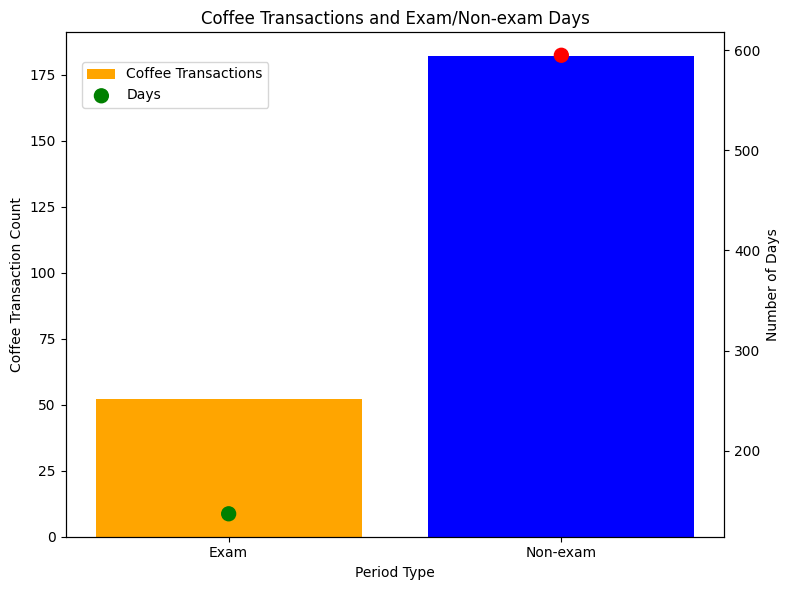

Coffe transactions during exam period / Total exam days : 52 / 137 = 0.3802281368821293
Coffe transactions during normal period / Total non-exam days : 182 / 595= 0.3058103975535168


In [117]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Period_Type": ["Exam", "Non-exam"],
    "Coffee_Transactions": [52, 182],
    "Days": [137, 595]
}

# DataFrame
coffee_transactions = pd.DataFrame(data)


coffee_counts = coffee_transactions["Coffee_Transactions"]
days = coffee_transactions["Days"]
period_types = coffee_transactions["Period_Type"]

# Create Graph
fig, ax1 = plt.subplots(figsize=(8, 6))

# Left Side
ax1.bar(period_types, coffee_counts, color=["orange", "blue"], label="Coffee Transactions")
ax1.set_xlabel("Period Type")
ax1.set_ylabel("Coffee Transaction Count", color="black")
ax1.tick_params(axis='y', labelcolor="black")
ax1.set_title("Coffee Transactions and Exam/Non-exam Days")

# right Side
ax2 = ax1.twinx()
ax2.scatter(period_types, days, color=["green", "red"], s=100, label="Days", marker='o')
ax2.set_ylabel("Number of Days", color="black")
ax2.tick_params(axis='y', labelcolor="black")

# Legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# plot
plt.tight_layout()
plt.show()
formatted_number = "%.2f" % (exam_total / len(df_exam))
formatted_number2 = "%.2f" % (non_exam_total / len(df_normal))
print(f"Coffe transactions during exam period / Total exam days : {len(df_exam)} / {exam_total} ="+" "+ str(1/float(formatted_number)))
print(f"Coffe transactions during normal period / Total non-exam days : {len(df_normal)} / {non_exam_total}="+" "+ str(1/float(formatted_number2)))


-The graph above demonstrates coffee transactions and the number of days during exam and non-exam periods. The ratio of transactions to days for both periods is very similar. This indicates that the average daily coffee transactions remain consistent across periods, suggesting no significant difference or impact of exam days on coffee consumption behavior.

##Second Graph: Plot of Transactions
This code generates a Dot plot visualizing coffee transactions over time. It distinguishes transactions occurring during exam and normal periods by using different colors: red for exam periods and blue for normal periods.

<ipython-input-79-b02cdfdf79f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["Transaction_Date"] = pd.to_datetime(df_coffee["Tarih"], format="%d.%m.%Y")
<ipython-input-79-b02cdfdf79f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["Jitter"] = np.random.uniform(0.7, 1.3, size=len(df_coffee))


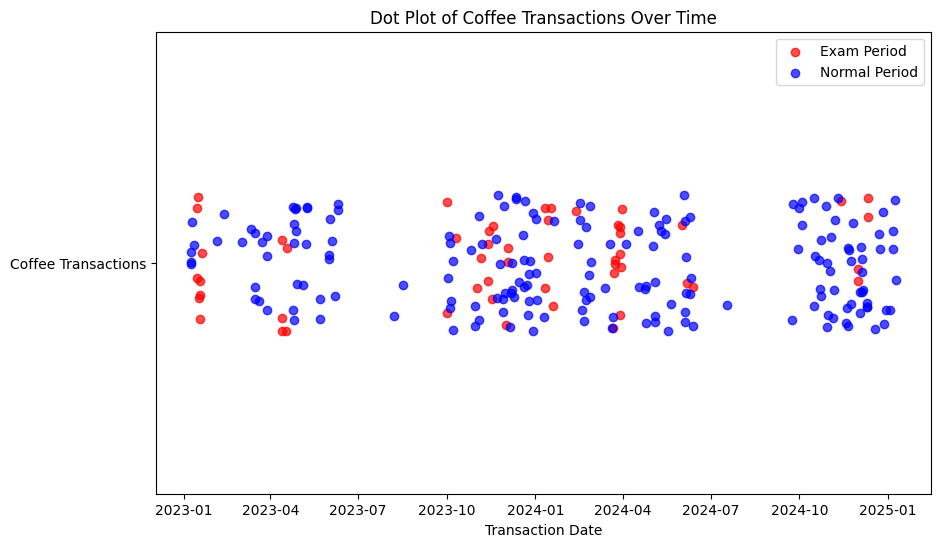

In [79]:
# Checking if Transaction_Date is in datetime format
df_coffee = (df[df['IsCoffee'] == True])
df_coffee["Transaction_Date"] = pd.to_datetime(df_coffee["Tarih"], format="%d.%m.%Y")

# Create a bit of random jitter so points don't overlap exactly if they share the same date
np.random.seed(42)
df_coffee["Jitter"] = np.random.uniform(0.7, 1.3, size=len(df_coffee))

# Separate exam vs. normal transactions
df_exam = df_coffee[df_coffee["Period_Type"] == "Exam"]
df_normal = df_coffee[df_coffee["Period_Type"] == "Normal"]

# Plot Graph
plt.figure(figsize=(10, 6))

# Plot exam transactions in red
plt.scatter(
    df_exam["Transaction_Date"],
    df_exam["Jitter"],
    color="red",
    alpha=0.7,
    label="Exam Period"
)

# Plot normal transactions in blue
plt.scatter(
    df_normal["Transaction_Date"],
    df_normal["Jitter"],
    color="blue",
    alpha=0.7,
    label="Normal Period"
)

# Clean up axes
plt.title("Dot Plot of Coffee Transactions Over Time")
plt.xlabel("Transaction Date")
# Extend the y-limits for a broader range
plt.ylim(0, 2)
# Show a single y-tick labeled as 'Coffee Transactions' (you can add more ticks if desired)
plt.yticks([1], ["Coffee Transactions"])

plt.legend()
plt.show()

-The above graph shows that there is no observable difference between the two periods, and the distribution remains consistent throughout.

##Third Graph: Daily Coffee Transactions During Exam and Normal Periods
This graph visualizes the daily coffee transactions separately for exam and normal periods. The red line represents the number of transactions during exam periods, while the blue line shows the transactions during normal periods. Each data point corresponds to the total number of transactions recorded on a particular day, grouped by their respective periods.

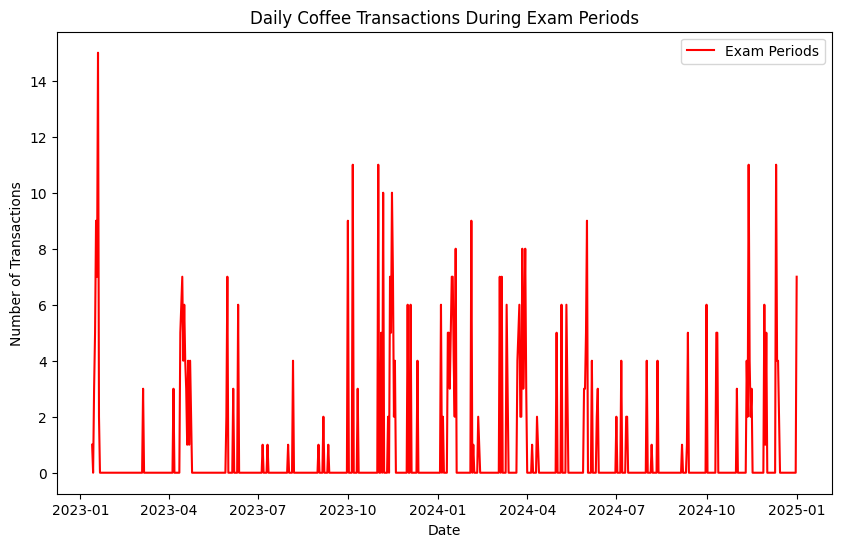

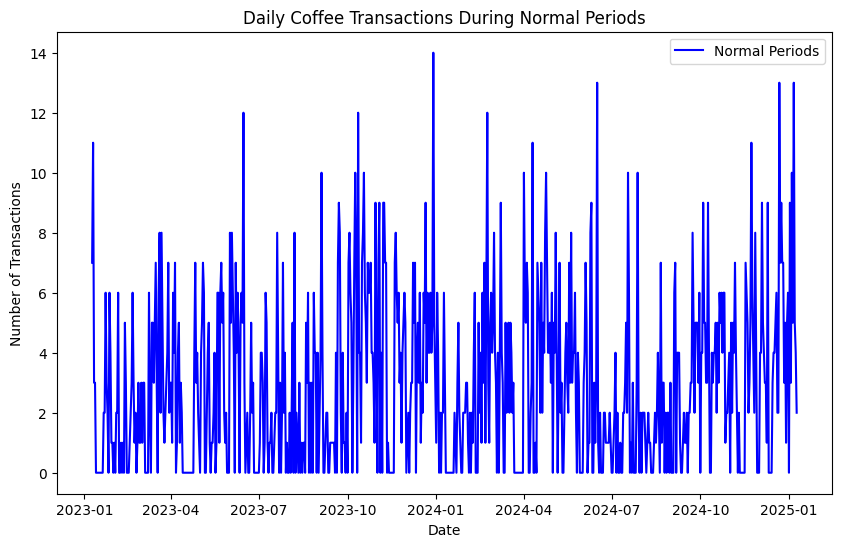

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure your Transaction_Date column is in datetime format
df["Tarih"] = pd.to_datetime(df["Tarih"], format='%d.%m.%Y')

# Create a new column for counting each transaction
df["Transaction_Count"] = 1

# Filter only Exam transactions
df_exam = df[df["Period_Type"] == "Exam"]

# Group by day, summing up the Transaction_Count
df_exam_daily = (
    df_exam.groupby(pd.Grouper(key="Tarih", freq="D"))["Transaction_Count"]
    .sum()
    .reset_index()
    .rename(columns={"Transaction_Count": "Exam_Transactions"})
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_exam_daily["Tarih"], df_exam_daily["Exam_Transactions"], label="Exam Periods", color="red")
plt.title("Daily Coffee Transactions During Exam Periods")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()

# Filter only Normal transactions
df_normal = df[df["Period_Type"] == "Normal"]

# Group by day, summing up Transaction_Count
df_normal_daily = (
    df_normal.groupby(pd.Grouper(key="Tarih", freq="D"))["Transaction_Count"]
    .sum()
    .reset_index()
    .rename(columns={"Transaction_Count": "Normal_Transactions"})
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_normal_daily["Tarih"], df_normal_daily["Normal_Transactions"], label="Normal Periods", color="blue")
plt.title("Daily Coffee Transactions During Normal Periods")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()


-Looking at the distributions of the above graphs, we can observe once again that the distributions for both periods are similar, with no noticeable differences between them.

# Additional Data Analysis

In addition to the statistics of my coffee consumption, I also wanted to analyze other topics. You can see these topics below.

## Favorite Brand

I checked my transactions and found out my favourite brand in campus:

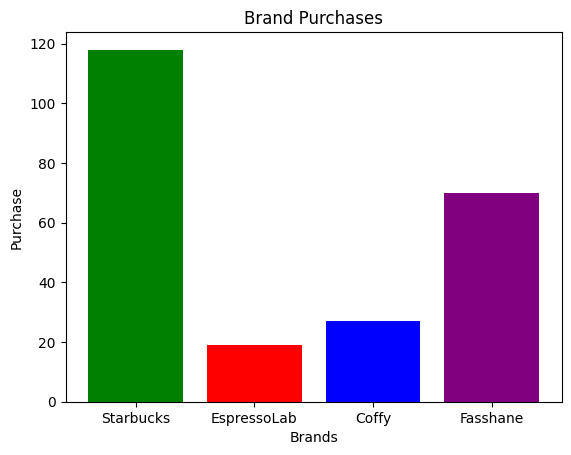

In [81]:
import matplotlib.pyplot as plt
import numpy as np
brands = list(brand_count.keys())
counts = list(brand_count.values())
plt.bar(brands, counts, color=['green', 'red', 'blue', 'purple'])
plt.title('Brand Purchases')
plt.xlabel('Brands')
plt.ylabel('Purchase')
plt.show()

## Seasonal Coffee Consumption
I wondered my habit of coffee consumption through the seasons and months

<ipython-input-96-8405b3ab1ab6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["Month"] = df_coffee["Tarih"].dt.month
<ipython-input-96-8405b3ab1ab6>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee['Season'] = df_coffee['Month'].apply(get_season)


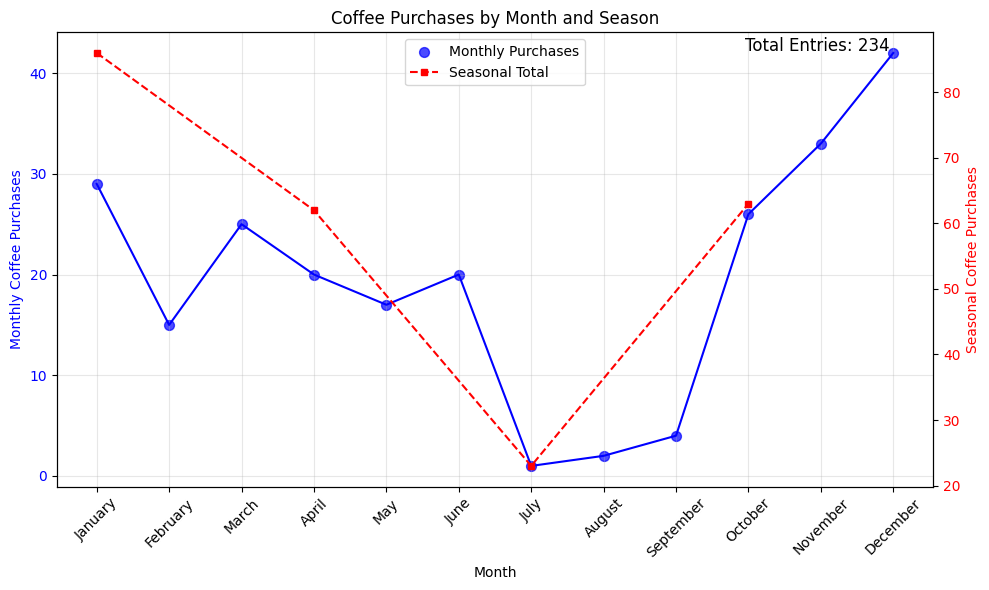

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert "Tarih" column to datetime format
df["Tarih"] = pd.to_datetime(df["Tarih"], format="%d.%m.%Y")

# Filter coffee transactions and extract month information
coffee_keywords = ["starbucks", "espresso", "coffy", "yukselen", "sabanci universitesi temassiz"]
df_coffee = df[df["Açıklama"].str.lower().str.contains("|".join(coffee_keywords))]
df_coffee["Month"] = df_coffee["Tarih"].dt.month

# Calculate coffee purchase count by month
coffee_counts_by_month = df_coffee.groupby("Month")["Açıklama"].count().reset_index()

# Create season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add season information
df_coffee['Season'] = df_coffee['Month'].apply(get_season)
seasonal_counts = df_coffee.groupby('Season')['Açıklama'].count()

# Create season to month mapping for plotting
season_middle_months = {'Winter': 1, 'Spring': 4, 'Summer': 7, 'Fall': 10}
seasonal_counts_plot = pd.Series([
    seasonal_counts['Winter'],
    seasonal_counts['Spring'],
    seasonal_counts['Summer'],
    seasonal_counts['Fall']
], index=[1, 4, 7, 10])

# Create the figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot monthly data on the first y-axis
ax1.scatter(coffee_counts_by_month["Month"], coffee_counts_by_month["Açıklama"], s=50, alpha=0.7, color='blue', label='Monthly Purchases')
ax1.plot(coffee_counts_by_month["Month"], coffee_counts_by_month["Açıklama"], linestyle='-', color='blue')

# Plot seasonal data on the second y-axis
ax2.plot(season_middle_months.values(), seasonal_counts_plot.values, color='red', linestyle='--', marker='s', markersize=5, label='Seasonal Total')

# Set labels and title
ax1.set_xlabel("Month")
ax1.set_ylabel("Monthly Coffee Purchases", color='blue')
ax2.set_ylabel("Seasonal Coffee Purchases", color='red')
plt.title("Coffee Purchases by Month and Season")

# Set x-axis ticks to month names
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)

# Add grid
ax1.grid(True, alpha=0.3)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center')

# Adjust colors of the y-axis labels
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Add total entries text
total_entries = len(df_coffee)
plt.text(0.95, 0.95, f"Total Entries: {total_entries}",
         transform=ax1.transAxes,
         ha="right",
         va="bottom",
         fontsize=12)

plt.tight_layout()
plt.show()

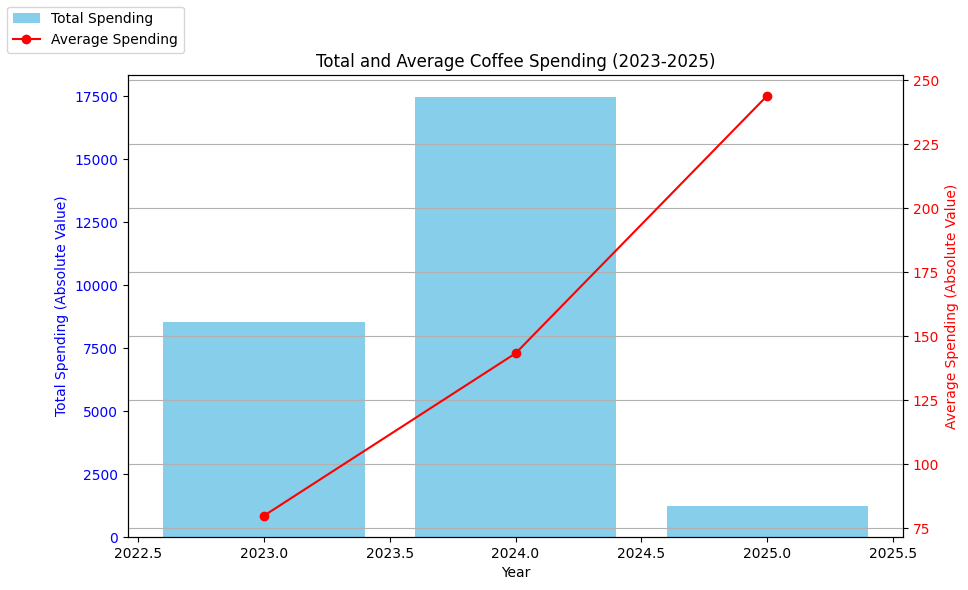

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for 2023, 2024, and 2025
df["Tarih"] = pd.to_datetime(df["Tarih"], format="%d.%m.%Y")
df_filtered = df[(df["Tarih"].dt.year >= 2023) & (df["Tarih"].dt.year <= 2025)]

# Filter for coffee transactions using brand names
coffee_brands = ["starbucks", "espresso", "coffy", "yukselen", "sabanci universitesi temassiz"]
df_coffee = df_filtered[df_filtered["Açıklama"].str.lower().str.contains("|".join(coffee_brands))]

# Calculate total coffee cost and count per year
yearly_data = df_coffee.groupby(df_coffee["Tarih"].dt.year).agg(
    total_cost=("Tutar", "sum"), total_count=("Açıklama", "count")
)

# Calculate average coffee cost per year using absolute value
yearly_data["average_cost"] = yearly_data["total_cost"].abs() / yearly_data["total_count"]

# Create a combined bar and line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total spending
ax1.bar(yearly_data.index, yearly_data["total_cost"].abs(), color="skyblue", label="Total Spending")
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Spending (Absolute Value)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a second y-axis for average spending
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data["average_cost"], color="red", marker="o", label="Average Spending")
ax2.set_ylabel("Average Spending (Absolute Value)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add title, legend, and grid
plt.title("Total and Average Coffee Spending (2023-2025)")
fig.legend(loc="upper left")  # Adjust legend location as needed
plt.grid(True)

plt.show()

## Findings and Conclusion

Based on our analysis:
1. Statistical results show no significant difference in coffee transaction frequency during exam periods (p > 0.05)
2. Total transactions:
   - Exam periods: 52
   - Normal periods: 182
3. Brand preferences show varying patterns of usage

### Limitations
- Analysis based on personal data only
- May not be generalizable to broader population
- Limited to specific coffee vendors